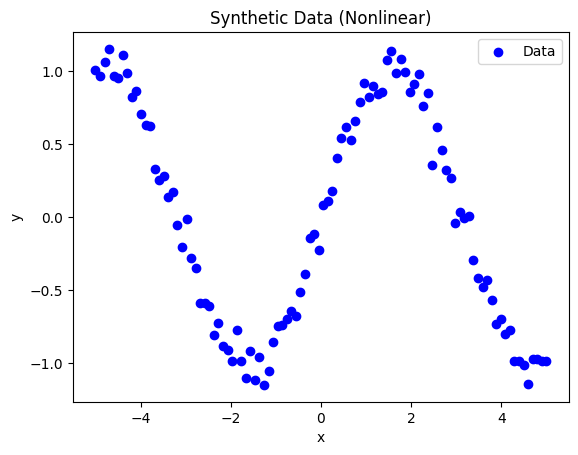

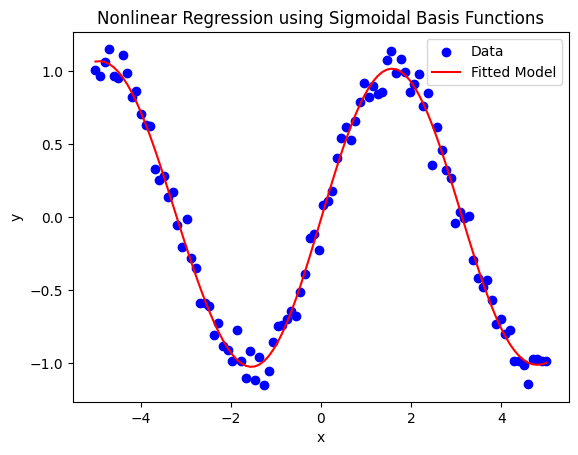

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (nonlinear)
np.random.seed(42)
x = np.linspace(-5, 5, 100)
y = np.sin(x) + 0.1 * np.random.randn(100)  # Add some noise to make it realistic

# Plot the data
plt.scatter(x, y, color='blue', label='Data')
plt.title('Synthetic Data (Nonlinear)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


def sigmoid_basis_function(x, mu, s):
    """Sigmoidal basis function."""
    return 1 / (1 + np.exp(-(x - mu) / s))

# Parameters for the basis functions
centers = np.linspace(-5, 5, 10)  # 10 centers evenly spaced between -5 and 5
s = 1  # Scale parameter (spread)


def design_matrix(x, centers, s):
    """Generate the design matrix for the given data."""
    phi = np.zeros((len(x), len(centers)))
    for i, mu in enumerate(centers):
        phi[:, i] = sigmoid_basis_function(x, mu, s)
    return phi

# Generate the design matrix for the data
phi = design_matrix(x, centers, s)


#Once we have the design matrix, we can solve for the weights 𝑤𝑗  using least squares regression. This can be done using the normal equation:
# 𝑤 = (Φ𝑇Φ)^−1.Φ^T𝑦

# Perform least squares to find weights
w = np.linalg.lstsq(phi, y, rcond=None)[0]


# Make predictions on the input data
#The expression phi @ w is a shorthand notation used in Python, specifically with the NumPy library, to perform matrix-vector multiplication (or dot product) between two arrays: phi and w.
y_pred = phi @ w

# Plot the results
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred, color='red', label='Fitted Model')
plt.title('Nonlinear Regression using Sigmoidal Basis Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
